## Preprocessing dan Feature Engineering

## Import Package

In [1]:
#Import library untuk data preparation dan visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings for ignore the warnings
import warnings 
warnings.filterwarnings("ignore")

# import pickle and json file for columns and model file
import pickle
import json
import joblib
import yaml
import scipy.stats as scs
import src.util as util

#Import package untuk balancing dataset
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pickle
import os

In [2]:
params_dir = "config/config.yaml"

In [3]:
def load_params(param_dir):
    with open(param_dir, 'r') as file:
        params = yaml.safe_load(file)
        
    return params

In [4]:
params = load_params(params_dir)

In [5]:
params

{'raw_dataset_dir': 'dataset/1 - raw data/',
 'train_set_path': ['dataset/2 - processed/X_train.pkl',
  'dataset/2 - processed/y_train.pkl'],
 'valid_set_path': ['dataset/2 - processed/X_valid.pkl',
  'dataset/2 - processed/y_valid.pkl'],
 'test_set_path': ['dataset/2 - processed/X_test.pkl',
  'dataset/2 - processed/y_test.pkl'],
 'train_feng_set_path': ['dataset/2 - processed/X_train_feng.pkl',
  'dataset/2 - processed/y_train_feng.pkl'],
 'valid_feng_set_path': ['dataset/2 - processed/X_valid_feng.pkl',
  'dataset/2 - processed/y_valid_feng.pkl'],
 'test_feng_set_path': ['dataset/2 - processed/X_test_feng.pkl',
  'dataset/2 - processed/y_test_feng.pkl'],
 'impute_data_train': ['dataset/2 - processed/X_train_impute.pkl',
  'dataset/2 - processed/y_test_impute.pkl'],
 'impute_data_test': ['dataset/2 - processed/X_test_impute.pkl',
  'dataset/2 - processed/y_test_impute.pkl'],
 'impute_data_valid': ['dataset/2 - processed/X_valid_impute.pkl',
  'dataset/2 - processed/y_valid_impute.pkl

In [6]:
config_data = util.load_config()

## Read Data

In [7]:
X_train = util.pickle_load(config_data["train_set_path"][0])
y_train = util.pickle_load(config_data["train_set_path"][1])

X_valid = util.pickle_load(config_data["valid_set_path"][0])
y_valid = util.pickle_load(config_data["valid_set_path"][1])

X_test = util.pickle_load(config_data["test_set_path"][0])
y_test = util.pickle_load(config_data["test_set_path"][1])

In [8]:
#Sanity Check
X_train

,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
378585,59.000,W,6470,111.0,150.0,visa,226.0,debit,299.0,87.0,...,102.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
85054,39.000,W,7826,481.0,150.0,mastercard,224.0,debit,184.0,87.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
442830,48.950,W,3070,537.0,150.0,visa,226.0,debit,315.0,87.0,...,0.0,36.950001,36.950001,36.950001,0.0,0.0,0.0,0.000000,0.000000,0.000000
448182,3224.450,W,9803,583.0,150.0,visa,226.0,credit,264.0,87.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,6448.899902,6448.899902,6448.899902
390346,34.000,W,13139,512.0,150.0,mastercard,224.0,debit,143.0,87.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194278,59.000,W,3277,111.0,150.0,visa,226.0,debit,231.0,87.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
192476,100.000,H,7585,553.0,150.0,visa,226.0,credit,299.0,87.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
17730,47.732,C,10086,500.0,185.0,mastercard,224.0,credit,431.0,60.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
28030,25.000,W,6933,477.0,150.0,mastercard,117.0,debit,204.0,87.0,...,119.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [9]:
#Sanity Check
y_train

378585    0
85054     0
442830    0
448182    0
390346    0
         ..
194278    0
192476    0
17730     1
28030     0
277869    0
Name: isFraud, Length: 413378, dtype: int64

In [10]:
#Sanity Check
X_valid

,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
26703,100.000,W,7919,194.0,150.0,mastercard,202.0,debit,143.0,87.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2877,82.950,W,11666,555.0,150.0,visa,226.0,debit,343.0,87.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
350334,100.000,R,3821,111.0,150.0,mastercard,219.0,credit,337.0,87.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
236126,107.950,W,18385,555.0,150.0,visa,226.0,debit,191.0,87.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
404743,209.950,W,18243,543.0,150.0,mastercard,224.0,debit,299.0,87.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280531,20.950,W,17188,321.0,150.0,visa,226.0,debit,299.0,87.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
516994,261.950,W,17188,321.0,150.0,visa,226.0,debit,299.0,87.0,...,107.949997,107.949997,107.949997,107.949997,523.900024,523.900024,523.900024,0.0,0.0,0.0
347517,49.000,W,17188,321.0,150.0,visa,226.0,debit,310.0,87.0,...,0.000000,98.000000,98.000000,98.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
34139,77.000,W,10112,360.0,150.0,visa,166.0,debit,272.0,87.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [11]:
#Sanity Check
y_valid

26703     0
2877      0
350334    0
236126    0
404743    0
         ..
280531    0
516994    0
347517    0
34139     0
320755    0
Name: isFraud, Length: 70865, dtype: int64

In [12]:
X_test

,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
504494,20.000,S,7919,194.0,150.0,mastercard,166.0,debit,203.0,87.0,...,25.0,25.0,25.0,25.0,0.0,0.0,0.0,50.0,50.0,50.0
454181,470.000,W,1804,161.0,150.0,mastercard,117.0,debit,123.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497372,66.030,C,2256,545.0,185.0,visa,226.0,credit,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
418123,82.950,W,7505,175.0,150.0,visa,226.0,debit,264.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
387902,30.950,W,9992,455.0,150.0,mastercard,126.0,debit,143.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171690,764.950,W,11690,111.0,150.0,visa,226.0,credit,299.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
478699,35.950,W,17400,174.0,150.0,visa,226.0,debit,123.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
351637,59.000,W,8953,321.0,150.0,visa,226.0,debit,441.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
300019,26.826,C,15885,545.0,185.0,visa,138.0,debit,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
#Sanity Check
y_test

504494    1
454181    0
497372    0
418123    0
387902    0
         ..
171690    0
478699    0
351637    0
300019    0
434151    0
Name: isFraud, Length: 106297, dtype: int64

In [14]:
#Menyatukan data X_train dan y_train untuk dilakukan preprocessing dan Feature Engineering menjadi satu set
dataset = pd.concat([X_train, y_train], axis = 1)

#Menyatukan data X_valid dan y_valid untuk dilakukan preprocessing dan Feature Engineering menjadi satu set
valid_set = pd.concat([X_valid, y_valid], axis = 1)

#Menyatukan data X_test dan y_test untuk dilakukan preprocessing dan Feature Engineering menjadi satu set
test_set = pd.concat([X_test, y_test], axis = 1)

## Handling Missing Value

In [15]:
# Fungsi handling missing value
from sklearn.impute import SimpleImputer

def imputeData(data, numerical_columns_mean, numerical_columns_median, categorical_columns):
    """
    Fungsi untuk melakukan imputasi data numerik dan kategorikal
    :param data: <pandas dataframe> sample data input
    :param numerical_columns_mean: <list> list kolom numerik data yang akan diimputasi dengan mean
    :param numerical_columns_median: <list> list kolom numerik data yang akan diimputasi dengan median
    :param categorical_columns: <list> list kolom kategorikal data
    :return numerical_data_imputed: <pandas dataframe> data numerik imputed
    :return categorical_data_imputed: <pandas dataframe> data kategorikal imputed
    """
    # Imputasi kolom numerik dengan mean
    numerical_data_mean = data[numerical_columns_mean]
    imputer_numerical_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    imputer_numerical_mean.fit(numerical_data_mean)
    imputed_data_mean = imputer_numerical_mean.transform(numerical_data_mean)
    numerical_data_imputed_mean = pd.DataFrame(imputed_data_mean, columns=numerical_columns_mean, index=numerical_data_mean.index)

    # Imputasi kolom numerik dengan median
    numerical_data_median = data[numerical_columns_median]
    imputer_numerical_median = SimpleImputer(missing_values=np.nan, strategy='median')
    imputer_numerical_median.fit(numerical_data_median)
    imputed_data_median = imputer_numerical_median.transform(numerical_data_median)
    numerical_data_imputed_median = pd.DataFrame(imputed_data_median, columns=numerical_columns_median, index=numerical_data_median.index)

    # Gabungkan kedua data numerik yang telah diimputasi
    numerical_data_imputed = pd.concat([numerical_data_imputed_mean, numerical_data_imputed_median], axis=1)

    # Seleksi data kategorikal
    categorical_data = data[categorical_columns]

    # Lakukan imputasi untuk data kategorikal dengan kata "empty"
    categorical_data_imputed = categorical_data.fillna("empty")

    # Gabungkan data numerik dan kategorikal yang telah diimputasi
    data_imputed = pd.concat([numerical_data_imputed, categorical_data_imputed], axis=1)

    return data_imputed

## Parameter Imputasi 

In [16]:
#Imputasi Data
numerical_column =  ['TransactionAmt', 'card3', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D10', 'D11', 'D15', 'V2', 'V3', 'V6', 'V7', 'V8', 'V9', 'V11', 'V15', 'V16', 'V17', 'V18', 'V21', 'V22', 'V23', 'V24', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V37', 'V38', 'V39', 'V40', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V62', 'V63', 'V64', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V77', 'V78', 'V79', 'V80', 'V81', 'V83', 'V84', 'V85', 'V86', 'V87', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321']
numerical_column_mean = ['card1', 'card2', 'card5', 'addr1', 'addr2', 'V1', 'V4', 'V5', 'V10', 'V12', 'V13', 'V14', 'V19', 'V20', 'V25', 'V35', 'V36', 'V41', 'V53', 'V54', 'V61', 'V65', 'V66', 'V75', 'V76', 'V82', 'V88', 'V107']
set_numerik = numerical_column + numerical_column_mean
dataset_column = list(X_train.columns)
categorical_column = list(set(dataset_column).difference(set(set_numerik)))

## Imputasi Data Train

In [17]:
#Imputasi Data
X_train_impute = imputeData(data = X_train, 
                            numerical_columns_mean = numerical_column_mean, 
                            numerical_columns_median = numerical_column, 
                            categorical_columns = categorical_column)

In [18]:
# Sanity Check Hasil Menghapus kolom dengan nilai null diatas 50%
for column in X_train_impute.columns:
    null_percentage = X_train_impute[column].isnull().mean() * 100
    print(f"Persentase nilai null pada kolom {column}: {null_percentage:.2f}%")

Persentase nilai null pada kolom card1: 0.00%
Persentase nilai null pada kolom card2: 0.00%
Persentase nilai null pada kolom card5: 0.00%
Persentase nilai null pada kolom addr1: 0.00%
Persentase nilai null pada kolom addr2: 0.00%
Persentase nilai null pada kolom V1: 0.00%
Persentase nilai null pada kolom V4: 0.00%
Persentase nilai null pada kolom V5: 0.00%
Persentase nilai null pada kolom V10: 0.00%
Persentase nilai null pada kolom V12: 0.00%
Persentase nilai null pada kolom V13: 0.00%
Persentase nilai null pada kolom V14: 0.00%
Persentase nilai null pada kolom V19: 0.00%
Persentase nilai null pada kolom V20: 0.00%
Persentase nilai null pada kolom V25: 0.00%
Persentase nilai null pada kolom V35: 0.00%
Persentase nilai null pada kolom V36: 0.00%
Persentase nilai null pada kolom V41: 0.00%
Persentase nilai null pada kolom V53: 0.00%
Persentase nilai null pada kolom V54: 0.00%
Persentase nilai null pada kolom V61: 0.00%
Persentase nilai null pada kolom V65: 0.00%
Persentase nilai null pad

## Imputasi Data Valid

In [19]:
#Imputasi Data
X_valid_impute = imputeData(data = X_valid, 
                            numerical_columns_mean = numerical_column_mean, 
                            numerical_columns_median = numerical_column, 
                            categorical_columns = categorical_column)

In [20]:
# Sanity Check Hasil Menghapus kolom dengan nilai null diatas 50%
for column in X_valid_impute.columns:
    null_percentage = X_valid_impute[column].isnull().mean() * 100
    print(f"Persentase nilai null pada kolom {column}: {null_percentage:.2f}%")

Persentase nilai null pada kolom card1: 0.00%
Persentase nilai null pada kolom card2: 0.00%
Persentase nilai null pada kolom card5: 0.00%
Persentase nilai null pada kolom addr1: 0.00%
Persentase nilai null pada kolom addr2: 0.00%
Persentase nilai null pada kolom V1: 0.00%
Persentase nilai null pada kolom V4: 0.00%
Persentase nilai null pada kolom V5: 0.00%
Persentase nilai null pada kolom V10: 0.00%
Persentase nilai null pada kolom V12: 0.00%
Persentase nilai null pada kolom V13: 0.00%
Persentase nilai null pada kolom V14: 0.00%
Persentase nilai null pada kolom V19: 0.00%
Persentase nilai null pada kolom V20: 0.00%
Persentase nilai null pada kolom V25: 0.00%
Persentase nilai null pada kolom V35: 0.00%
Persentase nilai null pada kolom V36: 0.00%
Persentase nilai null pada kolom V41: 0.00%
Persentase nilai null pada kolom V53: 0.00%
Persentase nilai null pada kolom V54: 0.00%
Persentase nilai null pada kolom V61: 0.00%
Persentase nilai null pada kolom V65: 0.00%
Persentase nilai null pad

## Imputasi Data Test

In [21]:
X_test_impute = imputeData(data = X_test, 
                           numerical_columns_mean = numerical_column_mean, 
                           numerical_columns_median = numerical_column, 
                           categorical_columns = categorical_column)

In [22]:
# Sanity Check Hasil Menghapus kolom dengan nilai null diatas 50%
for column in X_valid_impute.columns:
    null_percentage = X_valid_impute[column].isnull().mean() * 100
    print(f"Persentase nilai null pada kolom {column}: {null_percentage:.2f}%")

Persentase nilai null pada kolom card1: 0.00%
Persentase nilai null pada kolom card2: 0.00%
Persentase nilai null pada kolom card5: 0.00%
Persentase nilai null pada kolom addr1: 0.00%
Persentase nilai null pada kolom addr2: 0.00%
Persentase nilai null pada kolom V1: 0.00%
Persentase nilai null pada kolom V4: 0.00%
Persentase nilai null pada kolom V5: 0.00%
Persentase nilai null pada kolom V10: 0.00%
Persentase nilai null pada kolom V12: 0.00%
Persentase nilai null pada kolom V13: 0.00%
Persentase nilai null pada kolom V14: 0.00%
Persentase nilai null pada kolom V19: 0.00%
Persentase nilai null pada kolom V20: 0.00%
Persentase nilai null pada kolom V25: 0.00%
Persentase nilai null pada kolom V35: 0.00%
Persentase nilai null pada kolom V36: 0.00%
Persentase nilai null pada kolom V41: 0.00%
Persentase nilai null pada kolom V53: 0.00%
Persentase nilai null pada kolom V54: 0.00%
Persentase nilai null pada kolom V61: 0.00%
Persentase nilai null pada kolom V65: 0.00%
Persentase nilai null pad

In [23]:
# melihat unique value pada kolom kategori

# Menggunakan loop untuk melihat unique value pada masing-masing kolom
for column in X_train_impute.columns:
    if X_train_impute[column].dtype == 'object':
        unique_values = X_train_impute[column].unique()
        print(f"Unique values for column {column}:")
        print(unique_values)
        print('\n')

Unique values for column ProductCD:
['W' 'S' 'C' 'H' 'R']


Unique values for column M6:
['F' 'T' 'empty']


Unique values for column M2:
['T' 'F' 'empty']


Unique values for column card4:
['visa' 'mastercard' 'american express' 'discover' 'empty']


Unique values for column P_emaildomain:
['yahoo.com' 'gmail.com' 'anonymous.com' 'empty' 'aol.com' 'outlook.es'
 'hotmail.com' 'sbcglobal.net' 'outlook.com' 'yahoo.com.mx' 'icloud.com'
 'att.net' 'msn.com' 'windstream.net' 'verizon.net' 'mac.com'
 'comcast.net' 'hotmail.fr' 'bellsouth.net' 'twc.com' 'ymail.com'
 'live.com' 'roadrunner.com' 'charter.net' 'frontier.com' 'earthlink.net'
 'rocketmail.com' 'me.com' 'centurylink.net' 'hotmail.es' 'prodigy.net.mx'
 'aim.com' 'cox.net' 'frontiernet.net' 'cableone.net' 'optonline.net'
 'hotmail.de' 'mail.com' 'yahoo.co.uk' 'live.com.mx' 'q.com' 'gmail'
 'web.de' 'cfl.rr.com' 'netzero.com' 'juno.com' 'suddenlink.net'
 'sc.rr.com' 'yahoo.fr' 'yahoo.es' 'live.fr' 'gmx.de' 'netzero.net'
 'yahoo.co.jp'

In [24]:
# fungsi data defense agar data yang masuk sesuai dengan ketentuan
def data_defense(data, float_columns, object_columns, range_constraints, category_values):
    # Check float columns
    float_cols = data.select_dtypes(include=['float64']).columns
    for col in float_cols:
        assert col in float_columns, f"Error: Column '{col}' is not allowed as a float column."

    # Check object columns
    object_cols = data.select_dtypes(include=['object']).columns
    for col in object_cols:
        assert col in object_columns, f"Error: Column '{col}' is not allowed as an object column."
        # Check category values
        assert data[col].isin(category_values[col]).all(), f"Error: Column '{col}' has invalid category values."

    # Check range constraints
    for col, (min_val, max_val) in range_constraints.items():
        assert data[col].dtype == 'float64', f"Error: Column '{col}' should be of type float64."
        assert data[col].between(min_val, max_val).all(), f"Error: Column '{col}' has values outside the allowed range."

    print("Data defense passed successfully.")

In [25]:
float_columns  = [
    'card1', 'TransactionAmt', 'card2', 'card3', 'card5', 'addr1', 'addr2',
    'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14',
    'D1', 'D2', 'D3', 'D4', 'D10', 'D11', 'D15',
    'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
    'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
    'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30',
    'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40',
    'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50',
    'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60',
    'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70',
    'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80',
    'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90',
    'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100',
    'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110',
    'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120',
    'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130',
    'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137',
    'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V287', 'V288',
    'V289', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298',
    'V299', 'V300', 'V301', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308',
    'V309', 'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318',
    'V319', 'V320', 'V321'
]

object_columns = [
    'ProductCD', 'card4', 'card6', 'P_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M6'
]


In [26]:
range_constraints = {
                    #'isFraud': (0, 1),
                    'TransactionAmt': (0.251, 31937.391),
                    'card1': (1000, 18396),
                    'card2': (100.0, 600.0),
                    'card3': (100.0, 231.0),
                    'card5': (100.0, 237.0),
                    'addr1': (100.0, 540.0),
                    'addr2': (10.0, 102.0),
                    'C1': (0.0, 4685.0),
                    'C2': (0.0, 5691.0),
                    'C3': (0.0, 26.0),
                    'C4': (0.0, 2253.0),
                    'C5': (0.0, 349.0),
                    'C6': (0.0, 2253.0),
                    'C7': (0.0, 2255.0),
                    'C8': (0.0, 3331.0),
                    'C9': (0.0, 210.0),
                    'C10': (0.0, 3257.0),
                    'C11': (0.0, 3188.0),
                    'C12': (0.0, 3188.0),
                    'C13': (0.0, 2918.0),
                    'C14': (0.0, 1429.0),
                    'D1': (0.0, 640.0),
                    'D2': (0.0, 640.0),
                    'D3': (0.0, 819.0),
                    'D4': (-122.0, 869.0),
                    'D10': (0.0, 876.0),
                    'D11': (-53.0, 670.0),
                    'D15': (-83.0, 879.0),
                    'V1': (0.0, 1.0),
                    'V2': (0.0, 8.0),
                    'V3': (0.0, 9.0),
                    'V4': (0.0, 6.0),
                    'V5': (0.0, 6.0),
                    'V6': (0.0, 9.0),
                    'V7': (0.0, 9.0),
                    'V8': (0.0, 8.0),
                    'V9': (0.0, 8.0),
                    'V10': (0.0, 4.0),
                    'V11': (0.0, 5.0),
                    'V12': (0.0, 3.0),
                    'V13': (0.0, 6.0),
                    'V14': (0.0, 1.0),
                    'V15': (0.0, 7.0),
                    'V16': (0.0, 15.0),
                    'V17': (0.0, 15.0),
                    'V18': (0.0, 15.0),
                    'V19': (0.0, 7.0),
                    'V20': (0.0, 15.0),
                    'V21': (0.0, 5.0),
                    'V22': (0.0, 8.0),
                    'V23': (0.0, 13.0),
                    'V24': (0.0, 13.0),
                    'V25': (0.0, 7.0),
                    'V26': (0.0, 13.0),
                    'V27': (0.0, 4.0),
                    'V29': (0.0, 5.0),
                    'V30': (0.0, 9.0),
                    'V31': (0.0, 7.0),
                    'V32': (0.0, 15.0),
                    'V33': (0.0, 7.0),
                    'V34': (0.0, 13.0),
                    'V35': (0.0, 3.0),
                    'V36': (0.0, 5.0),
                    'V37': (0.0, 54.0),
                    'V38': (0.0, 54.0),
                    'V39': (0.0, 15.0),
                    'V40': (0.0, 24.0),
                    'V41': (0.0, 1.0),
                    'V42': (0.0, 8.0),
                    'V43': (0.0, 8.0),
                    'V44': (0.0, 48.0),
                    'V45': (0.0, 48.0),
                    'V46': (0.0, 6.0),
                    'V47': (0.0, 12.0),
                    'V48': (0.0, 5.0),
                    'V49': (0.0, 5.0),
                    'V50': (0.0, 5.0),
                    'V51': (0.0, 6.0),
                    'V52': (0.0, 12.0),
                    'V53': (0.0, 5.0),
                    'V54': (0.0, 6.0),
                    'V55': (0.0, 17.0),
                    'V56': (0.0, 51.0),
                    'V57': (0.0, 6.0),
                    'V58': (0.0, 10.0),
                    'V59': (0.0, 16.0),
                    'V60': (0.0, 16.0),
                    'V61': (0.0, 6.0),
                    'V62': (0.0, 10.0),
                    'V63': (0.0, 7.0),
                    'V64': (0.0, 7.0),
                    'V65': (0.0, 1.0),
                    'V66': (0.0, 7.0),
                    'V67': (0.0, 8.0),
                    'V68': (0.0, 2.0),
                    'V69': (0.0, 5.0),
                    'V70': (0.0, 6.0),
                    'V71': (0.0, 6.0),
                    'V72': (0.0, 10.0),
                    'V73': (0.0, 7.0),
                    'V74': (0.0, 8.0),
                    'V75': (0.0, 4.0),
                    'V76': (0.0, 6.0),
                    'V77': (0.0, 30.0),
                    'V78': (0.0, 31.0),
                    'V79': (0.0, 7.0),
                    'V80': (0.0, 19.0),
                    'V81': (0.0, 19.0),
                    'V82': (0.0, 7.0),
                    'V83': (0.0, 7.0),
                    'V84': (0.0, 7.0),
                    'V85': (0.0, 7.0),
                    'V86': (0.0, 30.0),
                    'V87': (0.0, 30.0),
                    'V88': (0.0, 1.0),
                    'V89': (0.0, 2.0),
                    'V90': (0.0, 5.0),
                    'V91': (0.0, 6.0),
                    'V92': (0.0, 7.0),
                    'V93': (0.0, 7.0),
                    'V94': (0.0, 2.0),
                    'V95': (0.0, 880.0),
                    'V96': (0.0, 1410.0),
                    'V97': (0.0, 976.0),
                    'V98': (0.0, 12.0),
                    'V99': (0.0, 88.0),
                    'V100': (0.0, 28.0),
                    'V101': (0.0, 869.0),
                    'V102': (0.0, 1285.0),
                    'V103': (0.0, 928.0),
                    'V104': (0.0, 15.0),
                    'V105': (0.0, 99.0),
                    'V106': (0.0, 55.0),
                    'V107': (0.0, 1.0),
                    'V108': (0.0, 7.0),
                    'V109': (0.0, 7.0),
                    'V110': (0.0, 7.0),
                    'V111': (0.0, 9.0),
                    'V112': (0.0, 9.0),
                    'V113': (0.0, 9.0),
                    'V114': (0.0, 6.0),
                    'V115': (0.0, 6.0),
                    'V116': (0.0, 6.0),
                    'V117': (0.0, 3.0),
                    'V118': (0.0, 3.0),
                    'V119': (0.0, 3.0),
                    'V120': (0.0, 3.0),
                    'V121': (0.0, 3.0),
                    'V122': (0.0, 3.0),
                    'V123': (0.0, 13.0),
                    'V124': (0.0, 13.0),
                    'V125': (0.0, 13.0),
                    'V126': (0.0, 160000.0),
                    'V127': (0.0, 160000.0),
                    'V128': (0.0, 160000.0),
                    'V129': (0.0, 55125.0),
                    'V130': (0.0, 55125.0),
                    'V131': (0.0, 55125.0),
                    'V132': (0.0, 93736.0),
                    'V133': (0.0, 133915.0),
                    'V134': (0.0, 98476.0),
                    'V135': (0.0, 90750.0),
                    'V136': (0.0, 90750.0),
                    'V137': (0.0, 90750.0),
                    'V279': (0.0, 880.0),
                    'V280': (0.0, 975.0),
                    'V281': (0.0, 22.0),
                    'V282': (0.0, 32.0),
                    'V283': (0.0, 68.0),
                    'V284': (0.0, 12.0),
                    'V285': (0.0, 95.0),
                    'V286': (0.0, 8.0),
                    'V287': (0.0, 31.0),
                    'V288': (0.0, 10.0),
                    'V289': (0.0, 12.0),
                    'V290': (1.0, 67.0),
                    'V291': (1.0, 1055.0),
                    'V292': (1.0, 323.0),
                    'V293': (0.0, 869.0),
                    'V294': (0.0, 1286.0),
                    'V295': (0.0, 928.0),
                    'V296': (0.0, 93.0),
                    'V297': (0.0, 12.0),
                    'V298': (0.0, 93.0),
                    'V299': (0.0, 49.0),
                    'V300': (0.0, 11.0),
                    'V301': (0.0, 13.0),
                    'V302': (0.0, 16.0),
                    'V303': (0.0, 20.0),
                    'V304': (0.0, 16.0),
                    'V305': (1.0, 2.0),
                    'V306': (0.0, 108800.0),
                    'V307': (0.0, 145765.0),
                    'V308': (0.0, 108800.0),
                    'V309': (0.0, 55125.0),
                    'V310': (0.0, 55125.0),
                    'V311': (0.0, 55125.0),
                    'V312': (0.0, 55125.0),
                    'V313': (0.0, 4817.47021484375),
                    'V314': (0.0, 7519.8701171875),
                    'V315': (0.0, 4817.47021484375),
                    'V316': (0.0, 93736.0),
                    'V317': (0.0, 134021.0),
                    'V318': (0.0, 98476.0),
                    'V319': (0.0, 104060.0),
                    'V320': (0.0, 104060.0),
                    'V321': (0.0, 104060.0)
                    }

category_values = {
    'ProductCD': ['W', 'H', 'C', 'S', 'R', 'empty'],
    'card4': ['discover', 'mastercard', 'visa', 'american express', 'empty'],
    'card6': ['credit', 'debit', 'empty', 'debit or credit', 'charge card'],
    'P_emaildomain': ['empty', 'gmail.com', 'outlook.com', 'yahoo.com', 'mail.com', 'anonymous.com', 'hotmail.com',
                      'verizon.net', 'aol.com', 'me.com', 'comcast.net', 'optonline.net', 'cox.net', 'charter.net',
                      'rocketmail.com', 'prodigy.net.mx', 'embarqmail.com', 'icloud.com', 'live.com.mx', 'gmail',
                      'live.com', 'att.net', 'juno.com', 'ymail.com', 'sbcglobal.net', 'bellsouth.net', 'msn.com',
                      'q.com', 'yahoo.com.mx', 'centurylink.net', 'servicios-ta.com', 'earthlink.net', 'hotmail.es',
                      'cfl.rr.com', 'roadrunner.com', 'netzero.net', 'gmx.de', 'suddenlink.net', 'frontiernet.net',
                      'windstream.net', 'frontier.com', 'outlook.es', 'mac.com', 'netzero.com', 'aim.com', 'web.de',
                      'twc.com', 'cableone.net', 'yahoo.fr', 'yahoo.de', 'yahoo.es', 'sc.rr.com', 'ptd.net',
                      'live.fr', 'yahoo.co.uk', 'hotmail.fr', 'hotmail.de', 'hotmail.co.uk', 'protonmail.com',
                      'yahoo.co.jp'],
    'M1': ['T', 'empty', 'F'],
    'M2': ['T', 'empty', 'F'],
    'M3': ['T', 'empty', 'F'],
    'M4': ['M2', 'M0', 'empty', 'M1'],
    'M6': ['T', 'F', 'empty']
}



In [27]:
# menggunakan fungsi data defense
data_defense(X_train_impute, float_columns, object_columns, range_constraints, category_values)

Data defense passed successfully.


## Get Dummies

In [28]:
# fungsi get dummies untuk kolom kategorikal
def get_dummies(train_df, input_df):
    # Menggabungkan data train dan input menjadi satu DataFrame
    combined_df = pd.concat([train_df, input_df])
    
    # Mengubah variabel kategorikal menjadi variabel dummy
    dummies_df = pd.get_dummies(combined_df, columns=train_df.select_dtypes(include='object').columns)
    
    # Memisahkan kembali data train dan input
    train_dummies = dummies_df[:train_df.shape[0]]
    input_dummies = dummies_df[train_df.shape[0]:]
    
    return train_dummies, input_dummies

In [29]:
#melakukan get dummies
dataset_ohe, valid_set = get_dummies(X_train_impute, X_valid_impute)

In [30]:
#melakukan get dummies
dataset, test_set = get_dummies(X_train_impute, X_test_impute)

## Balancing Label

In [31]:
#Import library untuk data preparation dan visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings for ignore the warnings
import warnings 
warnings.filterwarnings("ignore")

# import pickle and json file for columns and model file
import pickle
import json
import joblib
import yaml
import scipy.stats as scs

#Import package untuk balancing dataset
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pickle
import os

### SMOTE

In [32]:
def sm_fit_resample(set_data: pd.DataFrame) -> pd.DataFrame:
    # Create copy of set data
    set_data = set_data.copy()

    # Create sampling object
    sm = SMOTE(random_state = 112)

    # Balancing set data
    X_sm, y_sm = sm.fit_resample(
        set_data.drop("isFraud", axis = 1),
        set_data.isFraud
    )

    # Concatenate balanced data
    set_data_sm = pd.concat(
        [X_sm, y_sm],
        axis = 1
    )

    # Return balanced data
    return set_data_sm

In [33]:
dataset_full = pd.concat([dataset, y_train],axis = 1)

In [34]:
dataset_full.head()

,card1,card2,card5,addr1,addr2,V1,V4,V5,V10,V12,...,M1_empty,M3_F,M3_T,M3_empty,card6_charge card,card6_credit,card6_debit,card6_debit or credit,card6_empty,isFraud
378585,6470.0,111.0,226.0,299.0,87.0,1.0,1.0,1.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,0
85054,7826.0,481.0,224.0,184.0,87.0,1.0,0.0,0.0,0.0,1.0,...,0,0,1,0,0,0,1,0,0,0
442830,3070.0,537.0,226.0,315.0,87.0,1.0,1.0,1.0,1.0,0.0,...,0,0,1,0,0,0,1,0,0,0
448182,9803.0,583.0,226.0,264.0,87.0,1.0,1.0,1.0,0.0,1.0,...,0,1,0,0,0,1,0,0,0,0
390346,13139.0,512.0,224.0,143.0,87.0,1.0,1.0,1.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,0


In [35]:
dataset_smote = sm_fit_resample(dataset_full)

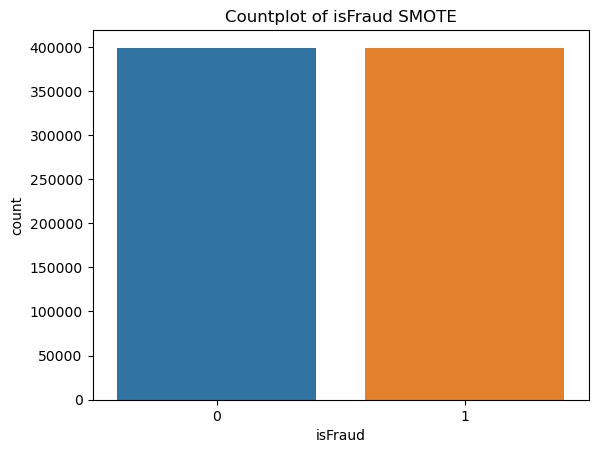

In [36]:
import seaborn as sns

# Menggunakan data dari tabel 'df' dan kolom 'Category'
sns.countplot(x='isFraud', data=dataset_smote)

# Menampilkan judul plot
plt.title('Countplot of isFraud SMOTE')

# Menampilkan plot
plt.show()

## Standart Scaler

In [37]:
columns_to_scale = ['TransactionAmt', 'card3', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 
                    'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D10', 'D11', 'D15', 'V2', 'V3', 'V6', 'V7', 'V8', 'V9', 'V11', 
                    'V15', 'V16', 'V17', 'V18', 'V21', 'V22', 'V23', 'V24', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 
                    'V33', 'V34', 'V37', 'V38', 'V39', 'V40', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 
                    'V51', 'V52', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V62', 'V63', 'V64', 'V67', 'V68', 'V69', 'V70', 
                    'V71', 'V72', 'V73', 'V74', 'V77', 'V78', 'V79', 'V80', 'V81', 'V83', 'V84', 'V85', 'V86', 'V87', 'V89', 
                    'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 
                    'V104', 'V105', 'V106', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 
                    'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 
                    'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 
                    'V285', 'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 
                    'V298', 'V299', 'V300', 'V301', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 
                    'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321','card1', 'card2', 
                    'card5', 'addr1', 'addr2', 'V1', 'V4', 'V5', 'V10', 'V12', 'V13', 'V14', 'V19', 'V20', 'V25', 'V35', 'V36', 
                    'V41', 'V53', 'V54', 'V61', 'V65', 'V66', 'V75', 'V76', 'V82', 'V88', 'V107']

def fit_scaler(train_data):
    scaler = StandardScaler()
    scaler.fit(train_data.loc[:, columns_to_scale])
    # save scaler
    with open('model/5 - Model Final/scaler.pkl', 'wb') as f:
        pickle.dump(scaler, f)
    return scaler

def load_scaler(folder_path):
    # load scaler
    file_path = os.path.join(folder_path, 'scaler.pkl')
    with open(file_path, 'rb') as f:
        scaler = pickle.load(f)
    return scaler

def transform_data(data, scaler):
    scaled_data = scaler.transform(data.loc[:, columns_to_scale])
    data.loc[:, columns_to_scale] = scaled_data
    return data

In [38]:
X_sm_clean = dataset_smote.drop(columns = "isFraud")
y_sm = dataset_smote["isFraud"]

In [39]:
#Melakukan sortir data agar urutan kolom sama
X_sm_clean = X_sm_clean[sorted(X_sm_clean.columns)]
X_valid_clean = valid_set[sorted(valid_set.columns)]
X_test_clean = test_set[sorted(test_set.columns)]

In [40]:
# sanity check
X_sm_clean.head()

,C1,C10,C11,C12,C13,C14,C2,C3,C4,C5,...,card4_discover,card4_empty,card4_mastercard,card4_visa,card5,card6_charge card,card6_credit,card6_debit,card6_debit or credit,card6_empty
0,5.0,0.0,1.0,0.0,3.0,3.0,2.0,0.0,0.0,0.0,...,0,0,0,1,226.0,0,0,1,0,0
1,5.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,...,0,0,1,0,224.0,0,0,1,0,0
2,2.0,0.0,1.0,0.0,13.0,2.0,1.0,0.0,0.0,1.0,...,0,0,0,1,226.0,0,0,1,0,0
3,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0,0,0,1,226.0,0,1,0,0,0
4,1.0,0.0,1.0,0.0,3.0,1.0,2.0,0.0,0.0,0.0,...,0,0,1,0,224.0,0,0,1,0,0


In [41]:
# sanity check
X_valid_clean.head()

,C1,C10,C11,C12,C13,C14,C2,C3,C4,C5,...,card4_discover,card4_empty,card4_mastercard,card4_visa,card5,card6_charge card,card6_credit,card6_debit,card6_debit or credit,card6_empty
26703,3.0,0.0,4.0,0.0,11.0,3.0,4.0,0.0,0.0,1.0,...,0,0,1,0,202.0,0,0,1,0,0
2877,1.0,0.0,1.0,0.0,10.0,1.0,2.0,0.0,0.0,1.0,...,0,0,0,1,226.0,0,0,1,0,0
350334,2.0,2.0,1.0,0.0,2.0,2.0,2.0,0.0,1.0,0.0,...,0,0,1,0,219.0,0,1,0,0,0
236126,4.0,0.0,2.0,0.0,17.0,3.0,3.0,0.0,0.0,1.0,...,0,0,0,1,226.0,0,0,1,0,0
404743,4.0,0.0,2.0,0.0,13.0,3.0,3.0,0.0,0.0,1.0,...,0,0,1,0,224.0,0,0,1,0,0


In [42]:
# sanity check
X_test_clean.head()

,C1,C10,C11,C12,C13,C14,C2,C3,C4,C5,...,card4_discover,card4_empty,card4_mastercard,card4_visa,card5,card6_charge card,card6_credit,card6_debit,card6_debit or credit,card6_empty
504494,1.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0,0,1,0,166.0,0,0,1,0,0
454181,1.0,0.0,1.0,0.0,11.0,1.0,1.0,0.0,0.0,0.0,...,0,0,1,0,117.0,0,0,1,0,0
497372,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,1,226.0,0,1,0,0,0
418123,3.0,0.0,3.0,0.0,10.0,3.0,2.0,0.0,0.0,1.0,...,0,0,0,1,226.0,0,0,1,0,0
387902,1.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,...,0,0,1,0,126.0,0,0,1,0,0


In [43]:
# fitting scaling sampai menyimpan model scaler dengan nama scaler.pkl
scaler = fit_scaler(X_sm_clean)

In [44]:
# sanity check
scaling = load_scaler('model/5 - Model Final/')

In [45]:
# transform data untuk data scaling
X_sm_clean = transform_data(X_sm_clean, scaling)
X_valid_clean = transform_data(X_valid_clean, scaling)
X_test_clean = transform_data(X_test_clean, scaling)

In [46]:
# sanity check
X_sm_clean.head()

,C1,C10,C11,C12,C13,C14,C2,C3,C4,C5,...,card4_discover,card4_empty,card4_mastercard,card4_visa,card5,card6_charge card,card6_credit,card6_debit,card6_debit or credit,card6_empty
0,-0.097170,-0.084263,-0.11352,-0.084443,-0.173159,-0.089850,-0.119697,-0.02847,-0.092114,-0.170119,...,0,0,0,1,0.709765,0,0,1,0,0
1,-0.097170,-0.084263,-0.11352,-0.084443,-0.187089,-0.120332,-0.119697,-0.02847,-0.092114,-0.170119,...,0,0,1,0,0.662599,0,0,1,0,0
2,-0.113201,-0.084263,-0.11352,-0.084443,-0.103511,-0.105091,-0.124260,-0.02847,-0.092114,-0.120069,...,0,0,0,1,0.709765,0,0,1,0,0
3,-0.118545,-0.084263,-0.11352,-0.084443,-0.187089,-0.120332,-0.124260,-0.02847,-0.092114,-0.120069,...,0,0,0,1,0.709765,0,1,0,0,0
4,-0.118545,-0.084263,-0.11352,-0.084443,-0.173159,-0.120332,-0.119697,-0.02847,-0.092114,-0.170119,...,0,0,1,0,0.662599,0,0,1,0,0


In [47]:
# sanity check
X_valid_clean.head()

,C1,C10,C11,C12,C13,C14,C2,C3,C4,C5,...,card4_discover,card4_empty,card4_mastercard,card4_visa,card5,card6_charge card,card6_credit,card6_debit,card6_debit or credit,card6_empty
26703,-0.107858,-0.084263,-0.09078,-0.084443,-0.117441,-0.089850,-0.110572,-0.02847,-0.092114,-0.120069,...,0,0,1,0,0.143774,0,0,1,0,0
2877,-0.118545,-0.084263,-0.11352,-0.084443,-0.124406,-0.120332,-0.119697,-0.02847,-0.092114,-0.120069,...,0,0,0,1,0.709765,0,0,1,0,0
350334,-0.113201,-0.069562,-0.11352,-0.084443,-0.180124,-0.105091,-0.119697,-0.02847,-0.081812,-0.170119,...,0,0,1,0,0.544684,0,1,0,0,0
236126,-0.102514,-0.084263,-0.10594,-0.084443,-0.075652,-0.089850,-0.115135,-0.02847,-0.092114,-0.120069,...,0,0,0,1,0.709765,0,0,1,0,0
404743,-0.102514,-0.084263,-0.10594,-0.084443,-0.103511,-0.089850,-0.115135,-0.02847,-0.092114,-0.120069,...,0,0,1,0,0.662599,0,0,1,0,0


In [48]:
# sanity check
X_test_clean.head()

,C1,C10,C11,C12,C13,C14,C2,C3,C4,C5,...,card4_discover,card4_empty,card4_mastercard,card4_visa,card5,card6_charge card,card6_credit,card6_debit,card6_debit or credit,card6_empty
504494,-0.118545,-0.069562,-0.11352,-0.084443,-0.187089,-0.120332,-0.124260,-0.02847,-0.081812,-0.170119,...,0,0,1,0,-0.705213,0,0,1,0,0
454181,-0.118545,-0.084263,-0.11352,-0.084443,-0.117441,-0.120332,-0.124260,-0.02847,-0.092114,-0.170119,...,0,0,1,0,-1.860779,0,0,1,0,0
497372,-0.118545,-0.076913,-0.11352,-0.076358,-0.187089,-0.120332,-0.124260,-0.02847,-0.081812,-0.170119,...,0,0,0,1,0.709765,0,1,0,0,0
418123,-0.107858,-0.084263,-0.09836,-0.084443,-0.124406,-0.089850,-0.119697,-0.02847,-0.092114,-0.120069,...,0,0,0,1,0.709765,0,0,1,0,0
387902,-0.118545,-0.084263,-0.11352,-0.084443,-0.187089,-0.120332,-0.119697,-0.02847,-0.092114,-0.120069,...,0,0,1,0,-1.648532,0,0,1,0,0


## Save Data

In [49]:
#menyimpan data dalam bentuk pickle
util.pickle_dump(X_sm_clean, config_data["standar_scaler_sm"][0])
util.pickle_dump(y_sm, config_data["standar_scaler_sm"][1])
    
util.pickle_dump(X_test_clean, config_data["standar_scaler_test"][0])
util.pickle_dump(y_test, config_data["standar_scaler_test"][1])

util.pickle_dump(X_valid_clean, config_data["standar_scaler_valid"][0])
util.pickle_dump(y_valid, config_data["standar_scaler_valid"][1])